In [1]:
%matplotlib inline

In [2]:
# %% 
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flake = gym.make("FrozenLake-v0", is_slippery=False)
Q = np.zeros((flake.observation_space.n, flake.action_space.n))
PI = np.argmax(Q,axis=1)

In [4]:
# %% Q-learning
def run_with_PI_exploration(PI=None, exploration=0.2, N_Iter = 100, render_flag=False):
    """
    Return buff_df if done, otherwise return None 
    """
    if PI is None:
        # No PI, action will be determined fully randomly
        exploration = 1.0

    s = flake.reset()
    if render_flag: flake.render()
    buff_df = pd.DataFrame({"S":[s],"S:(x,y)":[(0,0)], 
                "R":[0.0], "done":[False], 
                "A":[0], "A:name": [""]})
    buff_df.index.name = 'k'

    Actions = ["Left", "Down", "Right", "Up"]
    rand_buff =  np.random.rand(N_Iter)
    for iter in range(N_Iter):
        # if np.random.rand() <= exploration:
        if rand_buff[iter] <= exploration:
            a_k = flake.action_space.sample()
        else:
            a_k = PI[s]
        buff_df.loc[iter,'A':"A:name"] = (a_k, Actions[a_k])
        s, r, done, info = flake.step(a_k)
        if render_flag: flake.render()
        new_df = pd.DataFrame({"S":[s], "S:(x,y)":[(s%4,s//4)],
                                "R":[r], "done":[done], 
                                "A":[0], "A:name": [""]})
        buff_df = buff_df.append(new_df, ignore_index=True)
        buff_df.index.name = 'k'
        if done:
            return buff_df
    return None

buff_df = run_with_PI_exploration(PI, exploration=0.2, N_Iter=100)
buff_df

,S,"S:(x,y)",R,done,A,A:name
k,,,,,,
0,0,"(0, 0)",0.0,False,0,Left
1,0,"(0, 0)",0.0,False,0,Left
2,0,"(0, 0)",0.0,False,0,Left
3,0,"(0, 0)",0.0,False,0,Left
4,0,"(0, 0)",0.0,False,0,Left
...,...,...,...,...,...,...
56,4,"(0, 1)",0.0,False,0,Left
57,4,"(0, 1)",0.0,False,0,Left
58,4,"(0, 1)",0.0,False,0,Left


In [5]:
# %%
def q_learning(N_epoch=1000, N_Iter=100, learning_rate=0.01, exploration=0.2, trace_flag=False):
    """
    return PI 1-D integer array if trace_flag is False 
    else return PI_array 2-D integer array 
    """
    PI_list = []
    Q = np.zeros((flake.observation_space.n, flake.action_space.n))
    for e in range(N_epoch):
        PI = np.argmax(Q,axis=1)
        buff_df = run_with_PI_exploration(PI, exploration=exploration, N_Iter=N_Iter)
        for k in range(len(buff_df)-1):
            S, A = buff_df.S[k], buff_df.A[k]
            S_next, R_next = buff_df.S[k+1], buff_df.R[k+1]
            # print(k, S, A, S_next, R_next)
            Q_new = R_next + np.max(Q[S_next])
            Q[S,A] += learning_rate * (Q_new - Q[S,A])
        PI = np.argmax(Q,axis=1)
        PI_list.append(PI)
    if trace_flag:
        return np.array(PI_list)
    else:
        return PI

[1 2 1 0 1 0 1 0 2 2 1 0 0 2 2 0]


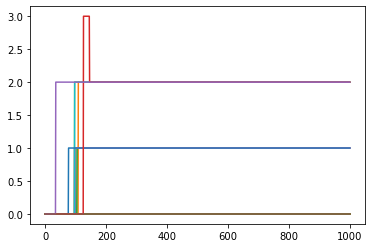

In [6]:
PI_array = q_learning(N_epoch=1000, N_Iter=100, learning_rate=0.01, exploration=0.8, trace_flag=True)
print(PI_array[-1])
plt.plot(PI_array)

[1 0 1 0 1 0 1 0 2 2 1 0 0 2 2 0]


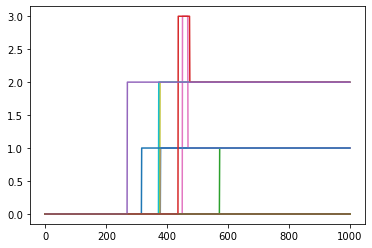

In [7]:
PI_array = q_learning(N_epoch=1000, N_Iter=100, learning_rate=0.01, exploration=0.6, trace_flag=True)
print(PI_array[-1])
plt.plot(PI_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


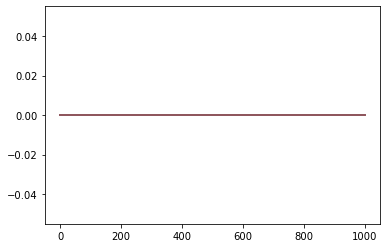

In [8]:
PI_array = q_learning(N_epoch=1000, N_Iter=100, learning_rate=0.01, exploration=0.4, trace_flag=True)
print(PI_array[-1])
plt.plot(PI_array)

In [ ]:
PI_array = q_learning(N_epoch=1000, N_Iter=100, learning_rate=0.01, exploration=0.2, trace_flag=True)
print(PI_array[-1])
plt.plot(PI_array)

In [ ]:
PI_array = q_learning(N_epoch=1000, N_Iter=100, learning_rate=0.01, exploration=0.1, trace_flag=True)
print(PI_array[-1])
plt.plot(PI_array)